# Functions

In [1]:
def graph_var_importance(gradient, x, y):
    from sklearn.model_selection import KFold
    from sklearn.feature_selection import RFECV
    
    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    )
    rfecv.fit(x, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(16, 12))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()
    return list(rfecv.get_feature_names_out())

In [2]:
def show_cm(model, y_test, pred):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot()
    plt.show()

# EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [4]:
data = pd.read_csv('carprices.csv', engine='c')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [5]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [6]:
df = pd.get_dummies(df, columns=['Car Model'], drop_first=True)
df

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


<AxesSubplot:>

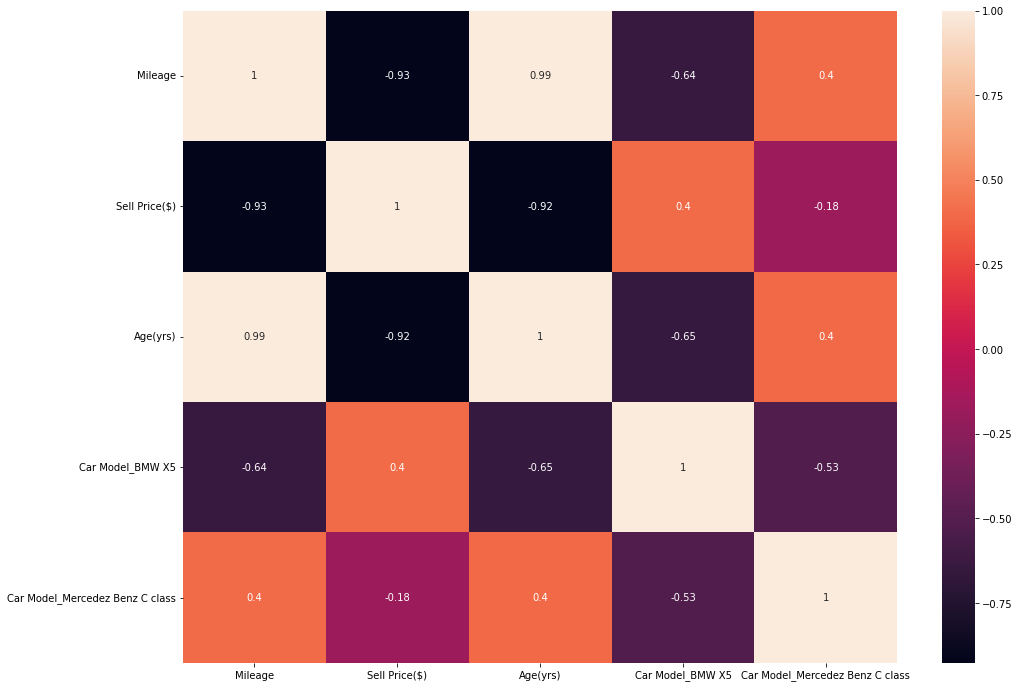

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)

In [8]:
scaler = MinMaxScaler()
y = df['Sell Price($)']
x = df.drop('Sell Price($)', axis=1)
x_new = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)
x_new

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0.678832,0.666667,1.0,0.0
1,0.182482,0.166667,1.0,0.0
2,0.503650,0.500000,1.0,0.0
3,0.000000,0.000000,1.0,0.0
4,0.343066,0.333333,1.0,0.0
5,0.532847,0.500000,0.0,0.0
6,0.430657,0.500000,0.0,0.0
7,0.722628,0.666667,0.0,0.0
8,1.000000,1.000000,0.0,0.0
9,0.649635,0.666667,0.0,1.0


# MODEL

In [9]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, r2_score, plot_confusion_matrix
import lightgbm as lgb

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3)

In [11]:
model1 = lgb.LGBMRegressor(learning_rate=0.05, num_leaves=1000, max_depth=4, min_child_weight=1.5)
model2 = xgb.XGBRegressor(n_estimators=1200, n_jobs=-1, max_depth=4, learning_rate=0.05, min_child_weight=0.6)

In [12]:
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

-0.23383106206281545

In [13]:
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.7832461850093385